In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [8]:
x_df = pd.read_csv('/home/oleg/Documents/matmod_challeng/X.csv')
y_df = pd.read_csv('/home/oleg/Documents/matmod_challeng/y.csv')


y_params = y_df.columns[3:]
merged_df = pd.merge(x_df, y_df, on=["engine_id", "flight_datetime", "flight_phase"])

merged_df = merged_df.dropna(axis=1, how='all')

params_to_predict = []
for val in y_params:
    if val in merged_df:
        params_to_predict.append(val)


for predicted_param in params_to_predict:
        merged_df = pd.merge(x_df, y_df, on=["engine_id", "flight_datetime", "flight_phase"])


        params_to_delete = y_params.drop(predicted_param)
        merged_df = merged_df.drop(params_to_delete, axis=1)


        merged_df = merged_df.dropna(how='all', axis=1)


        to_rm = [ 'engine_id', 'aircraft_id', 'flight_phase', 'engine_position', 'number_blades', 'engine_family', 'engine_type', 'manufacturer', 'aircraft_family', 'aircraft_grp', 'ac_manufacturer', 'aircraft_type', ]

        merged_df = merged_df.drop(to_rm, axis=1)

        merged_df = merged_df.loc[:,merged_df.apply(pd.Series.nunique) != 1]


        # splitting data :\

        if predicted_param in merged_df.columns:
            columns_w_train_data = merged_df.columns.drop([predicted_param, "flight_datetime"])

                
            x = merged_df[columns_w_train_data]
            y = merged_df[predicted_param]

            x = x.fillna(0)
            y = y.fillna(0)


            # from sklearn.preprocessing import StandardScaler

            # scaler = StandardScaler()
            # x = scaler.fit_transform(x)
            

            from sklearn.model_selection import train_test_split


            x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.20, shuffle = True)





1/1 [==============================] - 0s 44ms/step
32585      0.0
66106      0.0
38493      0.0
62027    100.0
70923    100.0
         ...  
55469      0.0
59910      0.0
39615     96.0
21122      0.0
77021    100.0
Name: ZHPTAC, Length: 500, dtype: float64
12446     -8.000000
81662    -23.875000
87202   -127.375000
76442      0.000000
33754    -15.625000
            ...    
2020      -8.125000
91152    -49.603760
49051     27.557617
75905    -86.625122
75436     -4.000000
Name: ZWF36_D, Length: 500, dtype: float64


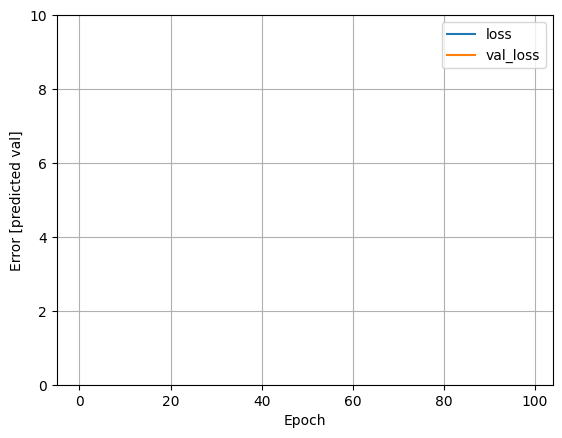

In [9]:
# NN model

x_train = x_train.dropna()
y_train = y_train.dropna()


x_train = x_train.sample(frac=0.8, random_state=0)
x_test = x_train.drop(x_train.index)


normalizer = tf.keras.layers.Normalization()
# normalizer.adapt(x_train)


ZPS3 = np.array(x_train['ZPS3'])

ZPS3_normalizer = layers.Normalization(input_shape=[1,], axis=None)
# ZPS3_normalizer.adapt(ZPS3)


ZPS3_model = tf.keras.Sequential([
    ZPS3_normalizer,
    layers.Dense(units=1)
])

ZPS3_model.predict(ZPS3[:10])


ZPS3_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')




history = ZPS3_model.fit(
    x_train['ZHPTAC'][:500],
    y_train[:500],
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


print(x_train['ZHPTAC'][:500])
print(y_train[:500])

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [predicted val]')
  plt.legend()
  plt.grid(True)


plot_loss(history)


8/8 [==============================] - 0s 1ms/step


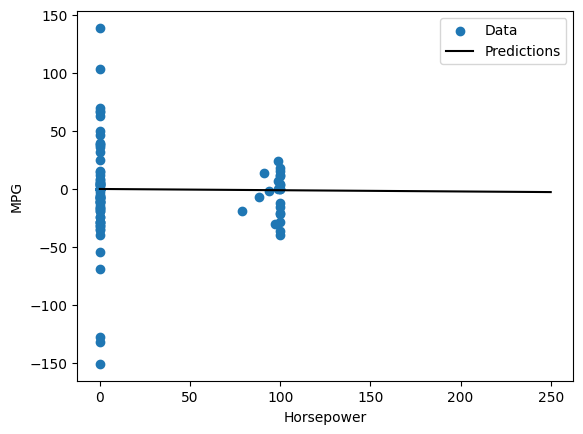

In [10]:
x = tf.linspace(0.0, 250, 251)
y = ZPS3_model.predict(x)


def plot_horsepower(x, y):
  plt.scatter(x_train['ZHPTAC'][:100], y_train[:100], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

plot_horsepower(x, y)